In [1]:
import numpy as np
import pandas as pd
import pickle

import shap
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

In [2]:
# load and concatenate design matrix

DATADIR = '../data/'

X_drug_labels = pickle.load(open(DATADIR+'X_drug_labels_train.p','rb'))
X_drug_targets = pickle.load(open(DATADIR+'X_drug_targets_train.p','rb'))
X_rna_seq_full = pickle.load(open(DATADIR+'X_rna_seq_full_train.p','rb'))

X = pd.concat([X_drug_labels,X_drug_targets,X_rna_seq_full],axis = 1)

In [3]:
shaps = pickle.load(open(DATADIR+'ensembled_explanations.p','rb'))

In [4]:
##
## look at the explanations for just the gene expression features, not drug target features
gene_shaps = shaps[:,158:15535]

In [10]:
##
## calculate expression-attribution corr.

correlations = [pearsonr(X_rna_seq_full.iloc[:,i].values,gene_shaps[:,i])[0] for i in range(gene_shaps.shape[1])]

corr_frame = pd.DataFrame(index=X_rna_seq_full.columns)
corr_frame['corr'] = correlations

##
## select the top 20 gene expression features by pos. expr-attr corr.
zero_frame = corr_frame.fillna(0).sort_values('corr',ascending=False)
X_sig = X.loc[:,X.columns.isin(zero_frame.index[:20])]
shaps_sig = shaps[:,:15535][:,X.columns.isin(zero_frame.index[:20])]

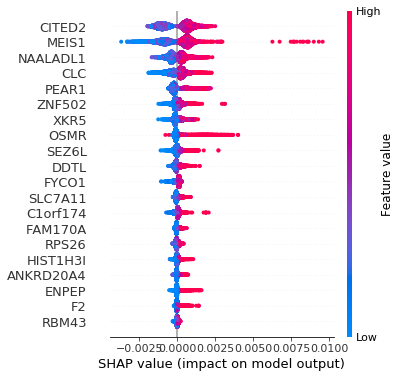

In [11]:
# plot
shap.summary_plot(shaps_sig,X_sig,plot_size=(5,6),show=False)#,axis_color='#FFFFFF')
# plt.savefig('summary_plot_left.pdf',dpi=300)
plt.show()

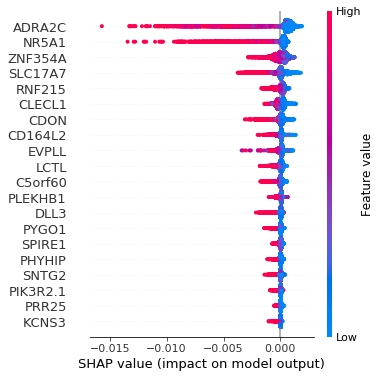

In [9]:
##
## select the top 20 gene expression features by neg. expr-attr corr.
zero_frame = corr_frame.fillna(0).sort_values('corr',ascending=True)
X_sig = X.loc[:,X.columns.isin(zero_frame.index[:20])]
shaps_sig = shaps[:,:15535][:,X.columns.isin(zero_frame.index[:20])]
shap.summary_plot(shaps_sig,X_sig,plot_size=(5,6),show=False)#,axis_color='#FFFFFF')
# plt.savefig('summary_plot_right.pdf',dpi=300)
plt.show()

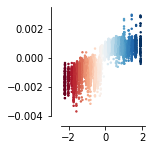

In [12]:
fig, ax = plt.subplots(figsize=(1.5,2))
data = np.stack([X.loc[:,'MEIS1'].values,shaps[:,list(X).index('MEIS1')]])
# plt.figure(figsize=(1.5,2),facecolor="white")
ax.scatter(data[0],data[1],c=data[0],cmap=plt.get_cmap("RdBu"),s=2)
# plt.axis('off')
ax.set_ylim([-0.004,0.0035])
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('meis1.png',dpi=300)
plt.show()

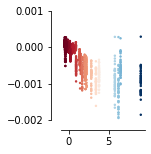

In [15]:
fig, ax = plt.subplots(figsize=(1.5,2))
data = np.stack([X.loc[:,'DLL3'].values,shaps[:,list(X).index('DLL3')]])
# plt.figure(figsize=(1.5,2),facecolor="white")
ax.scatter(data[0],data[1],c=data[0],cmap=plt.get_cmap("RdBu"),s=2)
# plt.axis('off')
ax.set_ylim([-0.002,0.001])
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# plt.savefig('dll3.png',dpi=300)
plt.show()